In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [7]:
plt.rcParams.update({
    'font.size': 30,
    'figure.figsize': [12, 8],
    'figure.dpi': 300,
    'xtick.major.width': 1,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0,
    'ytick.major.width': 1,
    'lines.linewidth': 3,
    'lines.markersize': 10,
})

In [8]:
eps = 1
sig = 1
def lj(r, eps=eps, sig=sig):
    return 4*eps*((sig/r)**12-(sig/r)**6)

rs = np.linspace(0.1,5,500)

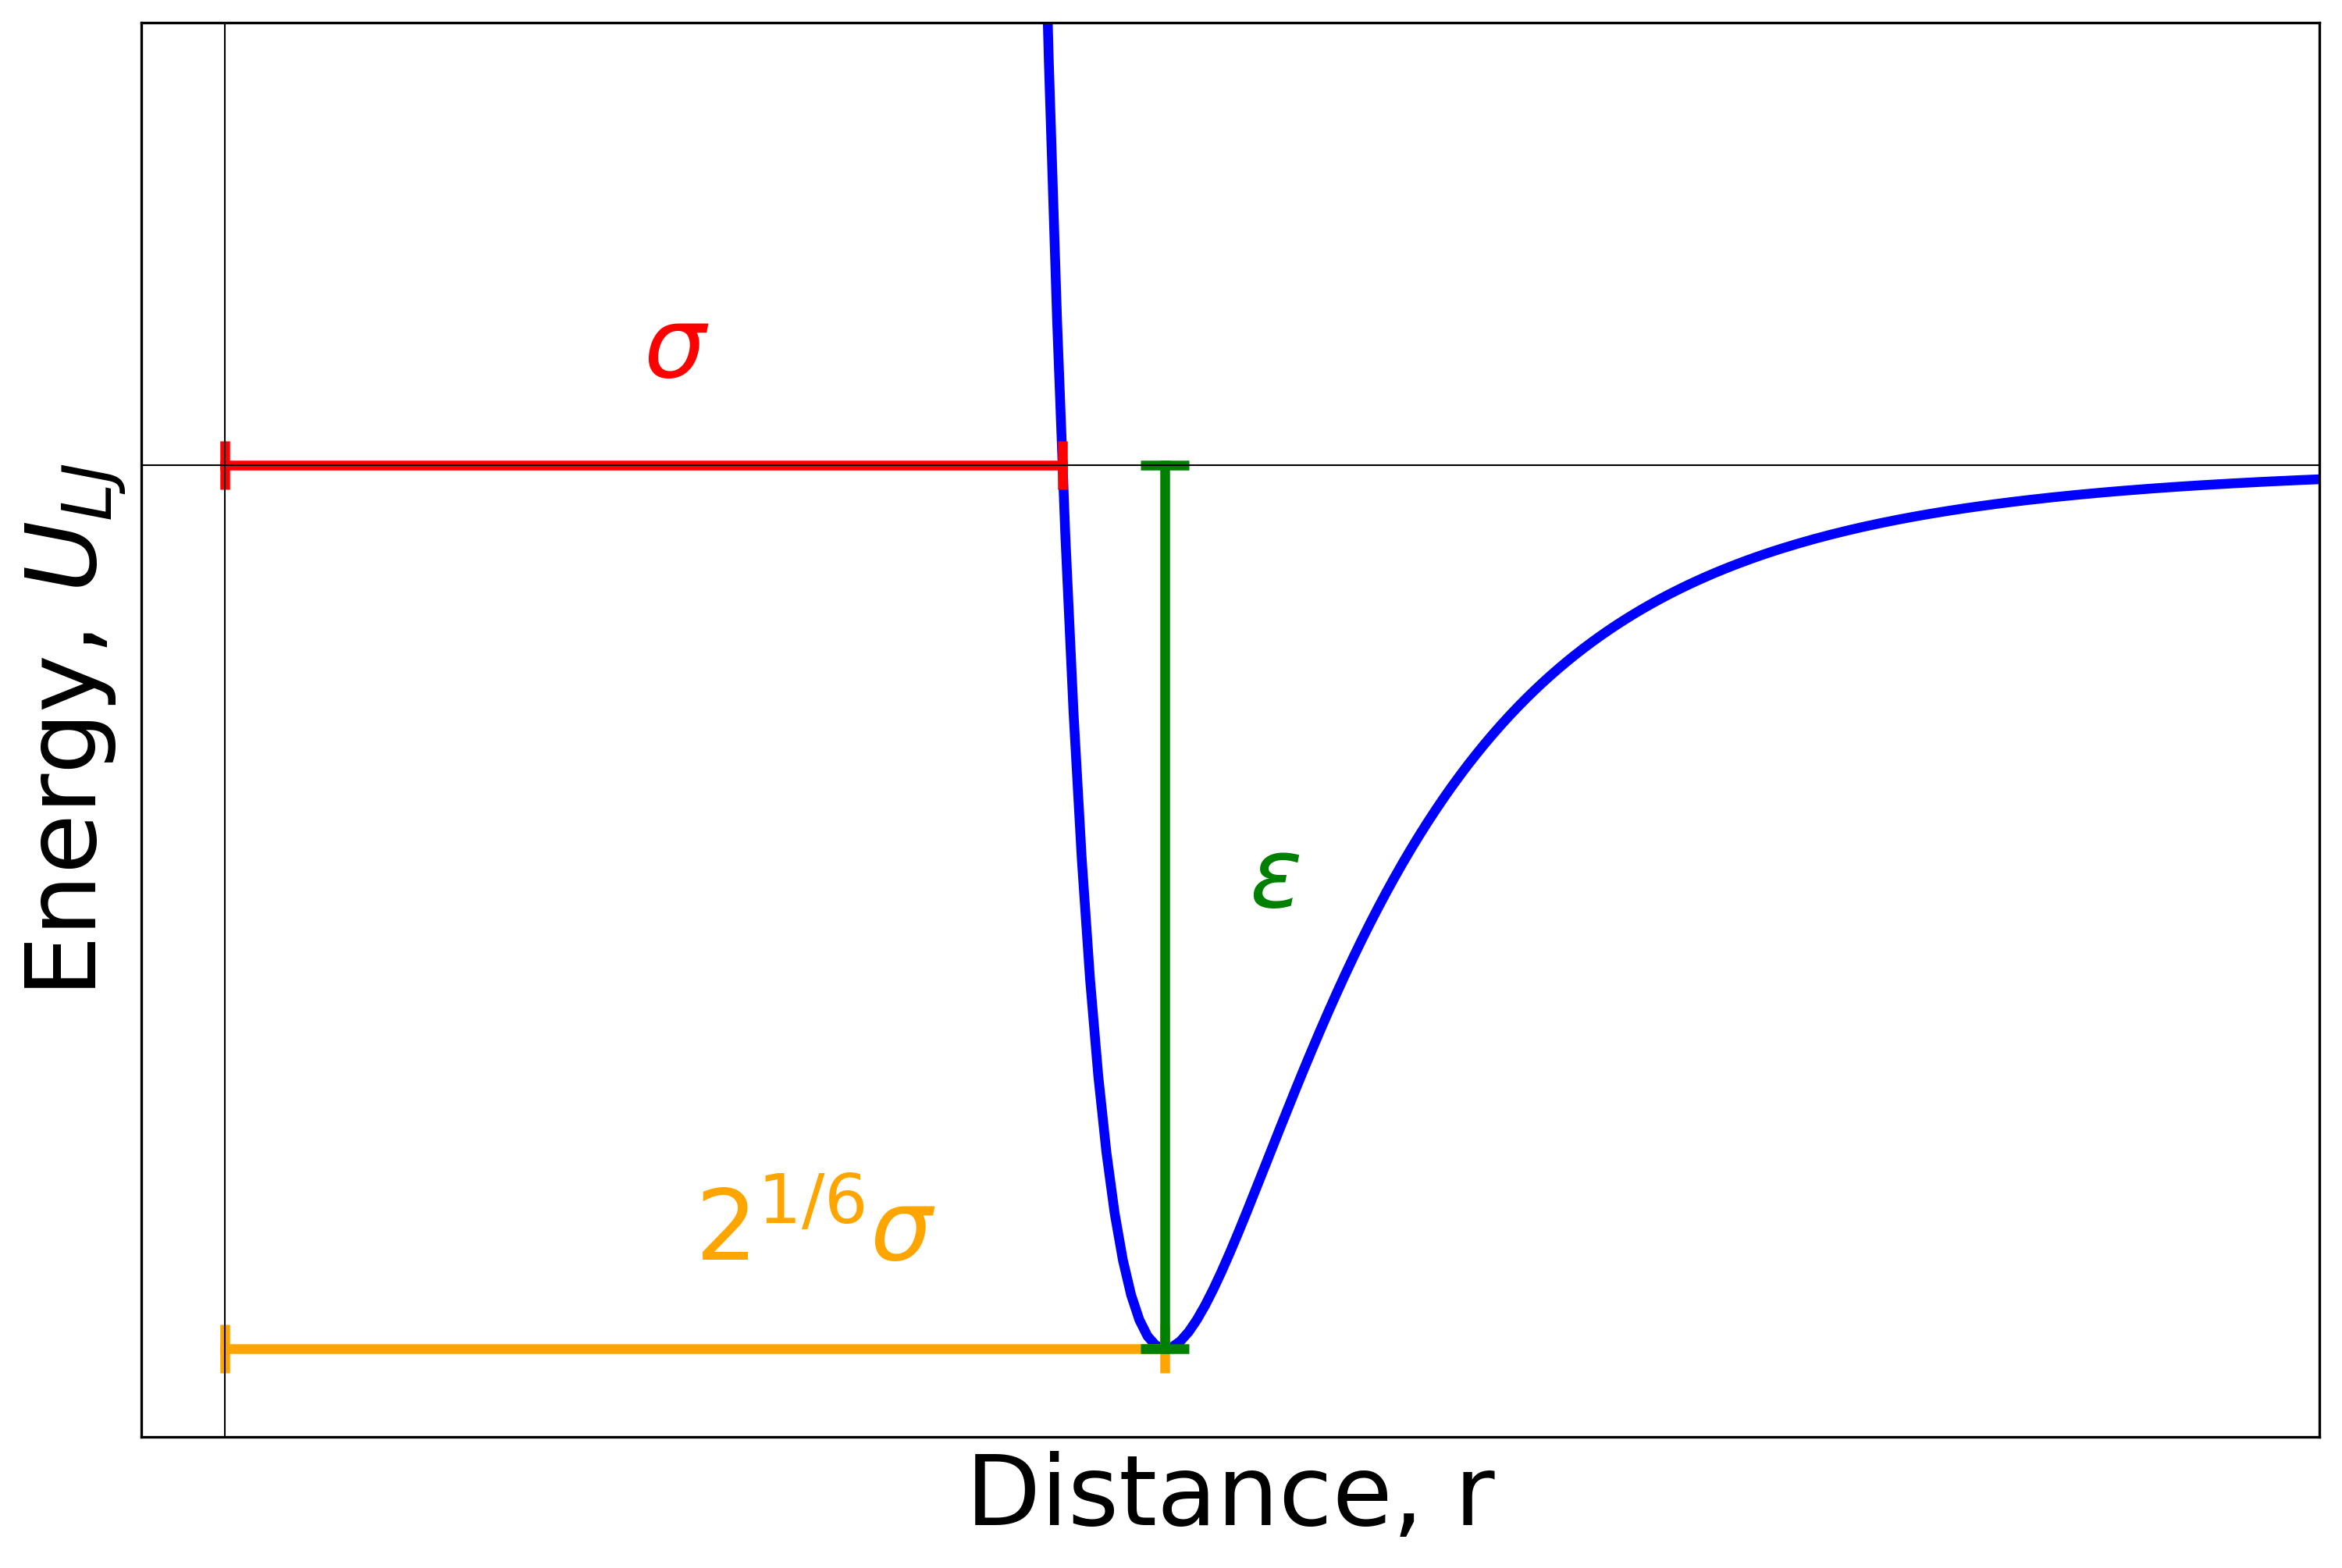

In [13]:
fig, ax = plt.subplots()

ax.plot(rs, lj(rs), color="b")

ax.text(sig/2,lj(sig)+0.1, r"$\sigma$", color="r")
ax.plot((0,sig),(0,lj(sig)), marker="|", markersize=15, mew=3, color ="r")

minsig = 2**(1/6)*sig
ax.text(minsig/2,lj(minsig)+0.1, r"$2^{1/6}\sigma$", color="orange")
ax.plot((0,minsig),(-eps,lj(minsig)), marker="|", markersize=15, mew=3, color ="orange")

ax.text(minsig+0.1,-eps/2, r"$\epsilon$", color="green")
ax.plot((minsig,minsig),(0,-eps), marker="_", markersize=15, mew=3, color ="green")

ax.set_xlabel("Distance, r")
ax.set_ylabel(r"Energy, $U_{LJ}$")
ax.set_ylim(-(eps+0.1),eps-0.5*eps)
ax.set_xlim(-.1, 2.5*sig)
ax.set_xticks([])
ax.set_yticks([])
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

fig.savefig('lj.pdf', bbox_inches='tight')

In [3]:
plt.rcParams.update({
    'font.size': 22,
    'figure.figsize': [12, 8],
    'figure.dpi': 300,
    'xtick.major.width': 1,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0,
    'ytick.major.width': 1,
    'lines.linewidth': 2,
    'lines.markersize': 8,
})

In [5]:
opvs = np.loadtxt("opvs.csv", delimiter=",")
opvs = opvs[opvs[:,0].argsort()]
sicells = np.loadtxt("sicells.csv", delimiter=",")
sicells = sicells[sicells[:,0].argsort()]

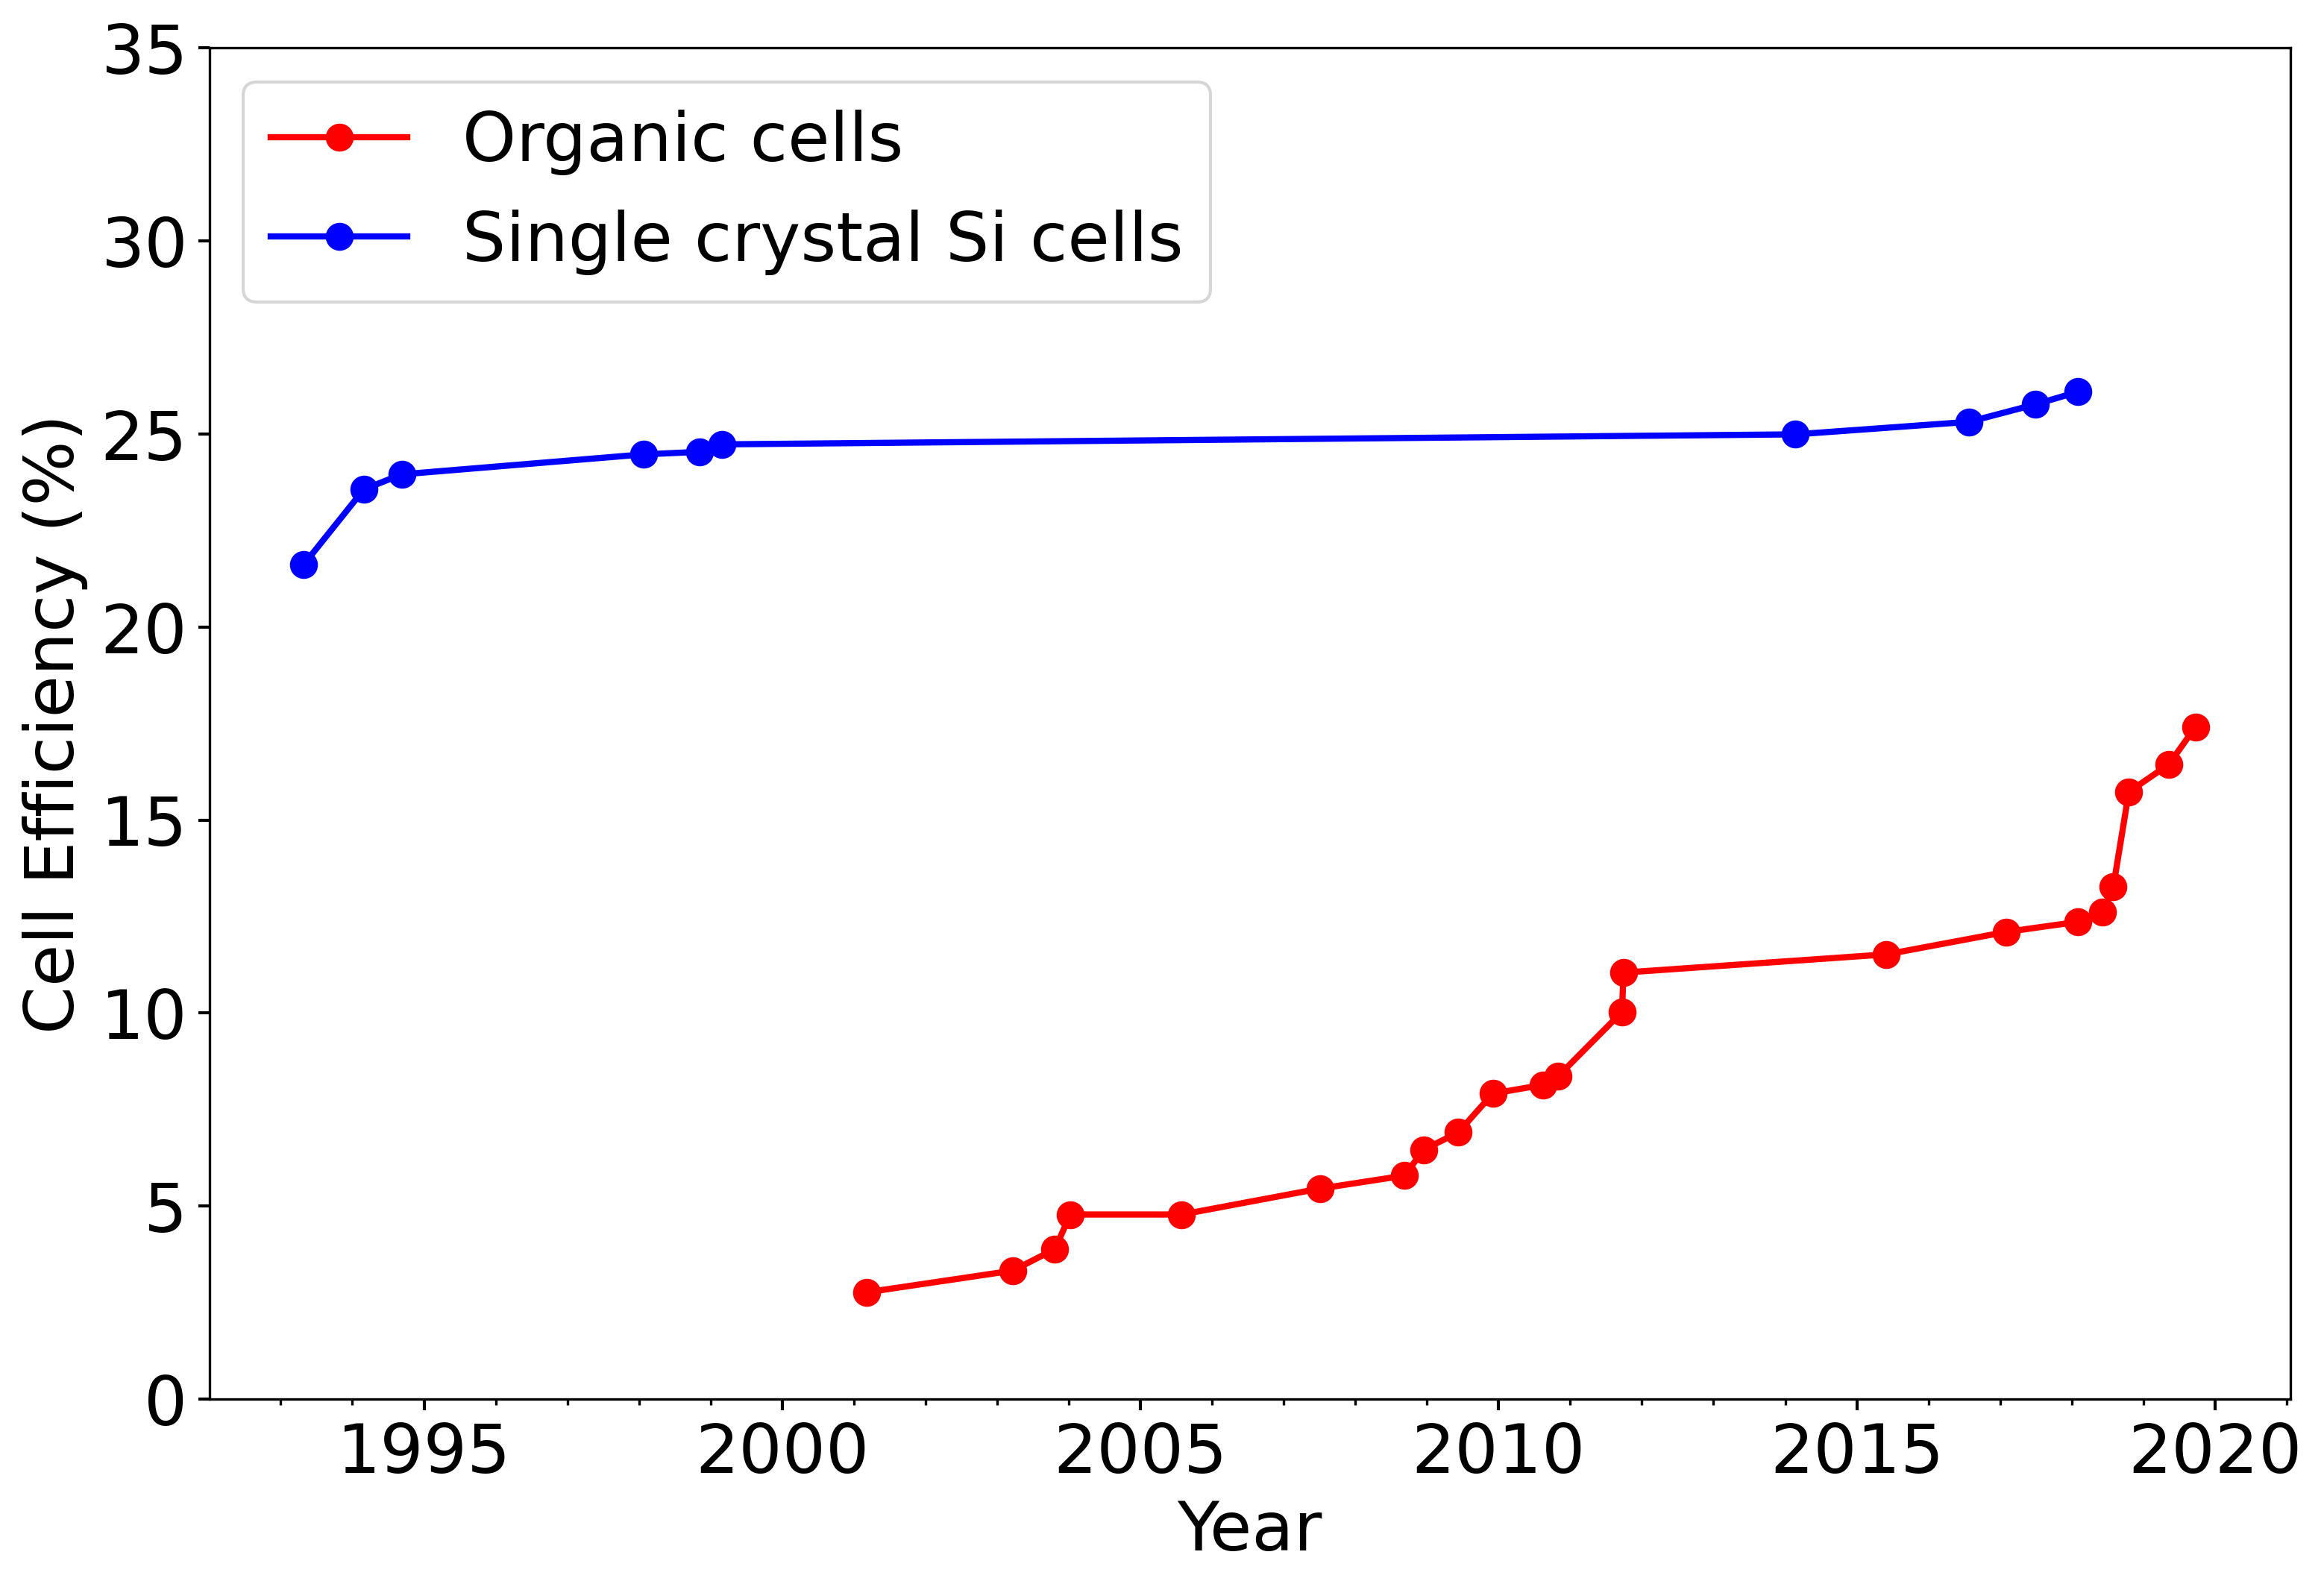

In [6]:
fig, ax = plt.subplots()

ax.plot(opvs[:,0], opvs[:,1], "-ro", label="Organic cells")

ax.plot(sicells[:,0], sicells[:,1], "-bo", label="Single crystal Si cells")


ax.set_ylabel("Cell Efficiency (%)")
ax.set_xlabel("Year")

ax.set_xticks(np.linspace(1995,2020,6))
ax.minorticks_on()
ax.set_ylim(0,35)
ax.legend(loc="upper left")

fig.savefig('NREL2020.pdf', bbox_inches='tight')